In [8]:
#pip install --upgrade pip
#pip install tensorflow
#pip install opencv-python

In [68]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os

#importamos TF2 y Keras
import tensorflow as tf
from tensorflow import keras

#usaremos datetime para nombrar archivos
import datetime

import numpy as np
import matplotlib.pyplot as plt

#para cargar imágenes desde internet usaremos estas librerías
from PIL import Image
import requests
from io import BytesIO

# lo usaremos para reescalar la imagen
import cv2

#rm -rf ./logs/

#nos aseguramos de que estemos con tf 2.0
print(tf.__version__)

2.11.0


In [69]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

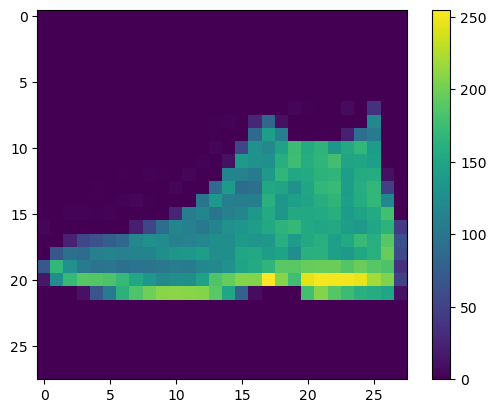

In [70]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [123]:
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']

In [72]:
class_names

['Camiseta',
 'Pantalón',
 'Suéter',
 'Vestido',
 'Abrigo',
 'Sandalia',
 'Camisa',
 'Zapatilla deportiva',
 'Bolso',
 'Botines']

In [73]:
train_images.shape

(60000, 28, 28)

In [74]:
test_images.shape

(10000, 28, 28)

In [75]:
train_labels.shape

(60000,)

In [76]:
test_labels.shape

(10000,)

In [77]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [30]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## Pre - Procesamiento de datos

In [78]:
train_images = train_images / 255
test_images = test_images / 255

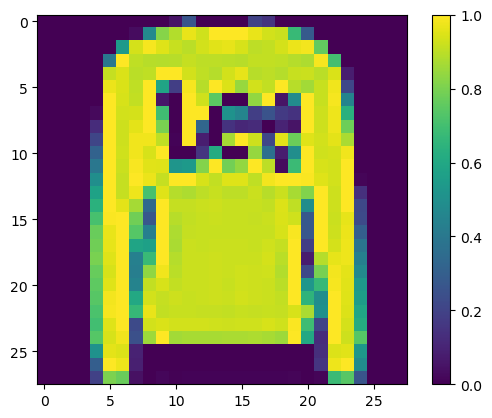

In [79]:
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

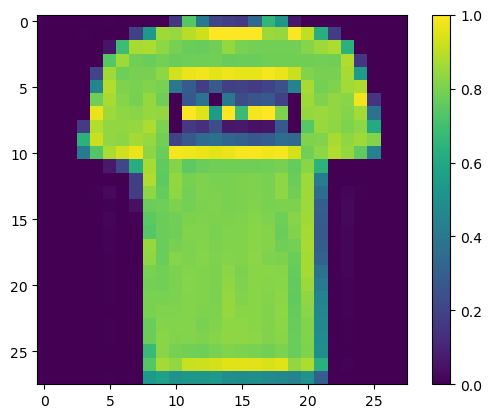

In [53]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

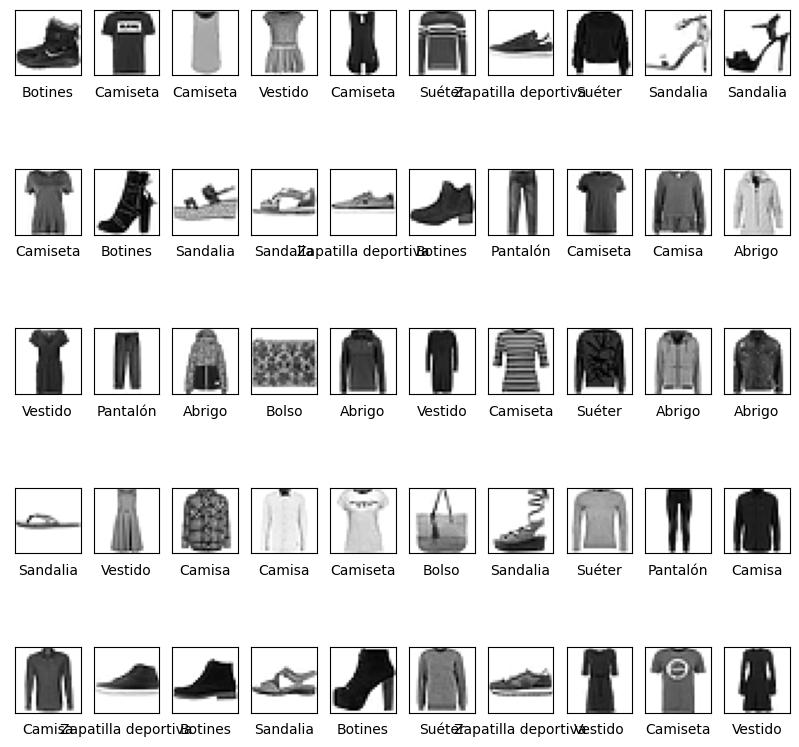

In [81]:
plt.figure(figsize = (10, 10))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow( train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## C107 Configuramos la red neuronal

In [82]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [83]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 15)                11775     
                                                                 
 dense_6 (Dense)             (None, 10)                160       
                                                                 
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


## C108. Compilamos el modelo

In [84]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [161]:
checkpoint_path = "checkpoints/check";
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
cp_callbacks = tf.keras.callbacks.ModelCheckpoint( checkpoint_path,
                                                         save_weights_only = True, verbose = 1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq = 1)
model.fit(train_images,
          train_labels,
          epochs = 50,
          validation_data = (test_images, test_labels),
          callbacks = [cp_callbacks, tensorboard_callback])

Epoch 1/50
1874/1875 [============================>.] - ETA: 0s - loss: 0.3176 - accuracy: 0.8858
Epoch 1: saving model to checkpoints\check
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3176 - accuracy: 0.8857 - val_loss: 0.4006 - val_accuracy: 0.8570
Epoch 2/50
1871/1875 [============================>.] - ETA: 0s - loss: 0.3139 - accuracy: 0.8880
Epoch 2: saving model to checkpoints\check
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3140 - accuracy: 0.8880 - val_loss: 0.4027 - val_accuracy: 0.8587
Epoch 3/50
1853/1875 [============================>.] - ETA: 0s - loss: 0.3128 - accuracy: 0.8858
Epoch 3: saving model to checkpoints\check
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3127 - accuracy: 0.8857 - val_loss: 0.4149 - val_accuracy: 0.8523
Epoch 4/50
1861/1875 [============================>.] - ETA: 0s - loss: 0.3117 - accuracy: 0.8870
Epoch 4: saving model to checkpoints\check
1875/1875 [==========================

In [130]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print ("Precision ->", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4068 - accuracy: 0.8544
Precision -> 0.8543999791145325


## C110 Haciendo predicciones

In [131]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [132]:
predictions

array([[3.95739744e-06, 4.46373737e-11, 3.18899333e-06, ...,
        7.16438796e-03, 6.58407444e-05, 9.86734748e-01],
       [2.17025554e-05, 6.94556296e-17, 9.76799071e-01, ...,
        1.09388248e-25, 1.62833985e-07, 3.07469492e-28],
       [2.88742594e-08, 1.00000000e+00, 1.06226208e-10, ...,
        3.14071069e-19, 5.00066433e-09, 3.93468699e-22],
       ...,
       [3.03408746e-02, 7.42875184e-09, 1.11327402e-03, ...,
        1.34233258e-09, 8.76654327e-01, 5.76093305e-11],
       [2.18805425e-07, 9.99864697e-01, 1.14037654e-07, ...,
        1.41475709e-12, 2.68698508e-09, 6.19463092e-11],
       [1.27057292e-05, 4.16481853e-08, 1.15275368e-04, ...,
        1.00951288e-02, 1.52036708e-04, 1.16301471e-05]], dtype=float32)

In [133]:
predictions[0]

array([3.9573974e-06, 4.4637374e-11, 3.1889933e-06, 7.2679470e-08,
       3.5629046e-07, 5.9747892e-03, 5.2676412e-05, 7.1643880e-03,
       6.5840744e-05, 9.8673475e-01], dtype=float32)

In [134]:
np.argmax(predictions[0])

9

## C111. Cargamos una imagen desde internet para hacer una predicción

In [135]:
response = requests.get("https://www.tecnitex.tienda/wp-content/uploads/2018/07/camiseta-tecnica-roja.jpg")
img = Image.open(BytesIO(response.content))

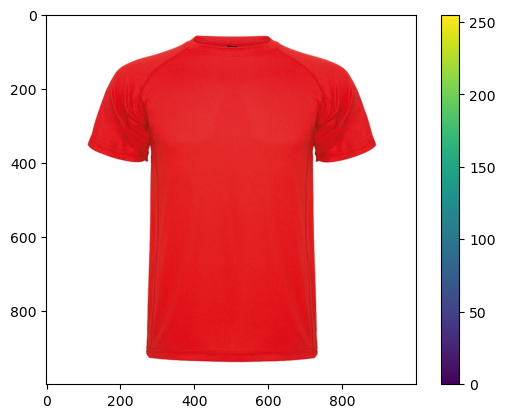

In [136]:
np_img = np.array(img)

plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

## Invertimos la imagen


In [137]:
np_img = 255 - np_img

## Mostramos la imagen

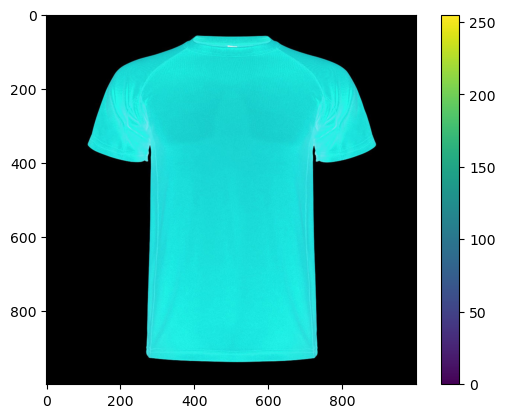

In [138]:
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

In [139]:
np_img.shape

(1000, 1000, 3)

In [140]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

In [141]:
bw_image = rgb2gray(np_img)

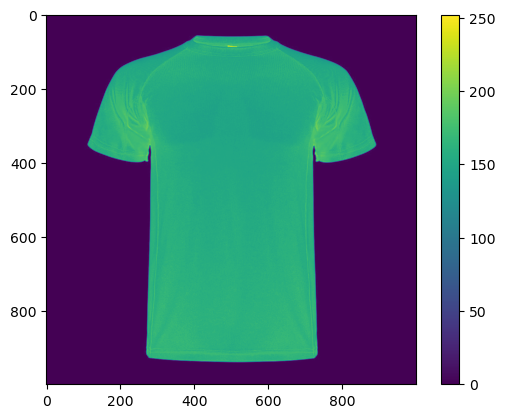

In [142]:
plt.figure()
plt.imshow(bw_image)
plt.colorbar()
plt.grid(False)
plt.show()

In [143]:
bw_image.shape

(1000, 1000)

In [144]:
res = cv2.resize(bw_image, dsize = (28,28), interpolation = cv2.INTER_CUBIC)

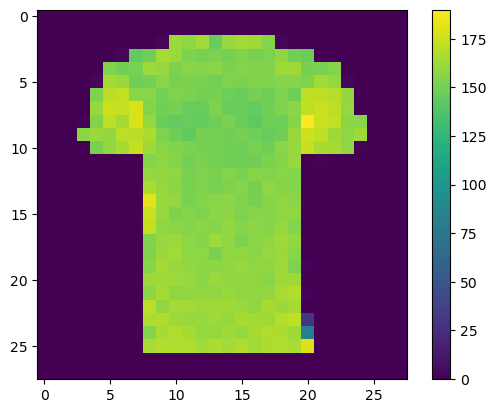

In [145]:
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

In [146]:
res = res/255

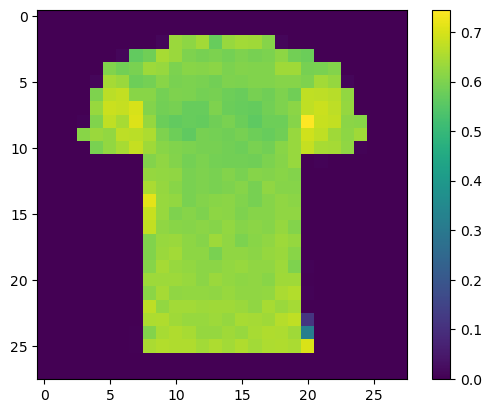

In [147]:
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

## Hacemos una prediccion con una imagen desconocida para nuestro modelo

In [148]:
x = np.zeros((1,28,28))


In [149]:
x

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0

In [150]:
x.shape

(1, 28, 28)

In [151]:
x[0] = np.array(res)

In [152]:
x[0]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00

In [153]:
predictions = model.predict(x)
predictions

1/1 [==============================] - 0s 26ms/step


array([[6.05451643e-01, 1.69197483e-05, 1.48083700e-03, 1.97512750e-03,
        5.97836857e-04, 3.28537653e-14, 3.90462428e-01, 1.60529211e-11,
        1.51470758e-05, 1.02983824e-13]], dtype=float32)

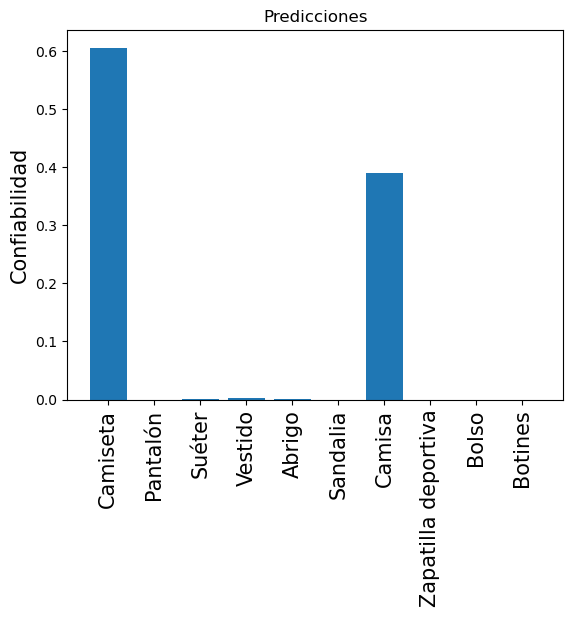

In [154]:
index = np.arange(len(class_names))
plt.bar(index, predictions[0])
plt.ylabel('Confiabilidad', fontsize = 15)
plt.xticks(index, class_names, fontsize = 15, rotation = 90)
plt.title('Predicciones')
plt.show()

## Creamos un nuevo modelo y lo probamos antes de entrenarlo

In [155]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [156]:
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [157]:
loss, acc = model2.evaluate( test_images, test_labels)
acc

313/313 [==============================] - 1s 2ms/step - loss: 2.3298 - accuracy: 0.1174


0.11739999800920486

In [158]:
model2.load_weights(checkpoint_path)
loss, acc = model2.evaluate( test_images, test_labels)


313/313 [==============================] - 1s 2ms/step - loss: 0.4068 - accuracy: 0.8544


In [159]:
pwd

'C:\\Users\\USER\\Documents\\ml_curso'